<h3>Graphically Solving a Linear Optimization Problem with Interactive Constraints</h3>

<p>The owner of a 3D printer company creates two products for a client. Product 1 brings a profit of 300 USD, while Product 2 brings a profit of 200 USD. Each printer runs up to 8 hours a day.</p>

<p>Printer 1 takes 4 hours to print Product 1 and 3 hours for Product 2.<br />Printer 2 takes 3 hours to print Product 1 and 2 hours for Product 2</p>

<p>Given the time-to-print constraints and a weekly deadline, the owner seeks to determine how many of Products 1 and 2 to print on each printer to <em>maximize</em> daily profits.

<p>We set up the problem as a table, below.</p>

<div>
    <table>
        <thead>
            <tr>
                <th>Printers</th>
                <th>Product 1</th>
                <th>Product 2</th>
                <th>Available Hours</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>Printer 1</td>
                <td>4 hrs</td>
                <td>3 hrs</td>
                <td>8 hrs</td>
            </tr>
            <tr>
                <td>Printer 2</td>
                <td>3 hrs</td>
                <td>2 hrs</td>
                <td>8 hrs</td>
            </tr>
        </tbody>
        <tfoot>
            <tr>
                <td>Unit Profit</td>
                <td>&#36;300</td>
                <td>&#36;200</td>
                <td>&nbsp;</td>
            </tr>
        </tfoot>
    </table>
</div></p>

<p>Next, we will define the objective function with the two printers which are the two decision variables. The profits become the coefficients for each printer.</p> 

<p>
Let x<sub>1</sub> = Printer 1<br />
Let x<sub>2</sub> = Printer 2
</p>

<p>The Objective Function is then defined as:</p>

<p>Z = &#36;300x<sub>1</sub> + &#36;200x<sub>2</sub></p>

In [1]:
# Define decision variables as profit per product.
x1_profit = 300
x2_profit = 200

<p>The constraints are defined the maximum hours per day each printer can run. The number of hours each printer takes to print each product becomes the coeficients for x<sub>1</sub> and x<sub>2</sub>.</p>
<div>
4x<sub>1</sub> + 3x<sub>2</sub> <= 8 hrs (Printer 1)<br />
3x<sub>1</sub> + 2x<sub>2</sub> <= 8 hrs (Printer 2)
</div>

Lastly, there are contraints for non-zero products defined as:

x<sub>1</sub> >= 0, x<sub>2</sub> >= 0

Define constraint variables as number of hours required per product.<br />
Assign the yet unknown coefficient (Beta) for each product to print to each printer.<br />
`Let b1 = Beta1` - to be determined<br />
`Let b2 = Beta2` - to be determined<br />
The maximum operational hours is 8 hours/day for each printer.

In [30]:
b1_x1 = 2; b1_x2 = 1; max_hrs_x1 = 8
b2_x1 = 1; b2_x2 = 2; max_hrs_x2 = 8

## Plot the Solution

In [31]:
# Import libraries.
import matplotlib.pyplot as plt
import numpy as np
from sympy import Symbol, solve

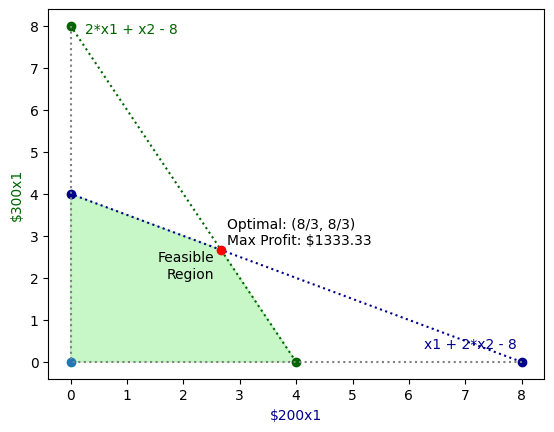

In [70]:
def get_bound(x1, x2, limit):
    x_1 = [limit/x1, 0.0]
    x_2 = [0.0, limit/x2]
    return x_1, x_2


def plot_solution(b1_x1, b1_x2, max_hrs_x1, x1_profit, b2_x1, b2_x2, max_hrs_x2, x2_profit):
    s1 = Symbol('x1')
    s2 = Symbol('x2')

    x1, y1 = get_bound(b1_x1, b1_x2, max_hrs_x1)
    x2, y2 = get_bound(b2_x1, b2_x2, max_hrs_x2)
    
    x1_exp = (max_hrs_x2 - (b2_x2*s2)) / b2_x1
    x2_exp = b1_x1*(x1_exp) + b1_x2*s2 - max_hrs_x1

    constraint1 = b1_x1*s1 + b1_x2*s2 - max_hrs_x1
    constraint2 = b2_x1*s1 + b2_x2*s2 - max_hrs_x2
    soln = solve((constraint1, constraint2), dict=True)[0]
    
    intersect_x = soln[s1]
    intersect_y = soln[s2]
    max_profit = x1_profit*s1 + x2_profit*s2
    max_profit = float(max_profit.subs({'x1': intersect_x, 'x2': intersect_y}))
    
    # Plot the first decision variable and constraint.
    plt.plot(x1, y1, linestyle=':', marker='o', color='darkgreen')
    plt.annotate(
        constraint1,
        (0, max_hrs_x1),
        textcoords="offset points",
        xytext=(10, -5),
        ha='left',
        color='darkgreen'
    )
    # Plot the second decision variable and constraint.
    plt.plot(x2, y2, linestyle=':', marker='o', color='darkblue')
    plt.annotate(
        constraint2,
        (max_hrs_x2, 0),
        textcoords="offset points",
        xytext=(-70, 10),
        ha='left',
        color='darkblue'
    )
    # Plot point for maximum profit.
    plt.plot(intersect_x, intersect_y, marker='o', color='red')
    plt.plot(0,0, marker='o')
    # Plot non-zero bounds.
    plt.plot([0, 0], [max_hrs_x1, 0], linestyle=':', color='grey')
    plt.plot([max_hrs_x2, 0], [0, 0], linestyle=':', color='grey')
    # Fill Feasible Region
    plt.fill(
        [0, 0, intersect_x, x1[0]],
        [0, y2[1], intersect_y, 0],
        color='lightgreen', alpha=0.5
    )
    # Plot labels for maximum profit.
    plt.annotate(
        f"Optimal: ({intersect_x}, {intersect_y})\nMax Profit: ${max_profit:0.2f}",
        (intersect_x, intersect_y),
        textcoords="offset points",
        xytext=(4,4),
        ha='left')
    plt.annotate(
        "Feasible\nRegion",
        (intersect_x, intersect_y),
        textcoords="offset points",
        xytext=(-5,-20), ha='right'
    )
    # Draw X and Y axis labels.
    plt.xlabel(f"${x2_profit}x1", color='darkblue')
    plt.ylabel(f"${x1_profit}x1", color='darkgreen')
    # Render plot.
    plt.show()

# Test our plot.
plot_solution(b1_x1, b1_x2, max_hrs_x1, x1_profit, b2_x1, b2_x2, max_hrs_x2, x2_profit)

## Adding Interactive Controls for 'What-if' Scenarios?

Now suppose the owner would like to easily update the model as time and profits change, and/or they purchase new printers that take less time. We can set up a dashboard of pywidgets to make the plot interactive to address "what-if" scenarios as variables change.

In [64]:
import ipywidgets as widgets

b1_x1_slider = widgets.IntSlider(value=b1_x1, min=1, max=10, step=1, description='b1_x1')
b1_x2_slider = widgets.IntSlider(value=b1_x2, min=1, max=10, step=1, description='b1_x2')
max_hrs_x1_slider = widgets.IntSlider(value=max_hrs_x1, min=1, max=10, step=1, description='Max Hrs Printer 1')

b2_x1_slider = widgets.IntSlider(value=b2_x1, min=1, max=10, step=1, description='b2_x1')
b2_x2_slider = widgets.IntSlider(value=b2_x2, min=1, max=10, step=1, description='b2_x2')
max_hrs_x1_slider = widgets.IntSlider(value=max_hrs_x2, min=1, max=10, step=1, description='Max Hrs Printer 2')

def compute(b1_x1, b1_x2, max_hrs_x1, x1_profit, b2_x1, b2_x2, max_hrs_x2, x2_profit):
    try:
        plot_solution(b1_x1, b1_x2, max_hrs_x1, x1_profit, b2_x1, b2_x2, max_hrs_x2, x2_profit)
    except:
        pass

widgets.interactive(
    compute,
    b1_x1=b1_x1_slider.value,
    b1_x2=b1_x2_slider.value,
    max_hrs_x1=max_hrs_x1_slider.value,
    x1_profit=x1_profit,
    b2_x1=b2_x1_slider.value,
    b2_x2=b2_x2_slider.value,
    max_hrs_x2=max_hrs_x1_slider.value,
    x2_profit=x2_profit
)

interactive(children=(IntSlider(value=2, description='b1_x1', max=6, min=-2), IntSlider(value=1, description='…